In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 셋 불러오기 및 정제 하기

In [3]:
df_train_activity = pd.read_csv('/project/Bigcontest/final/train_activity.csv')

In [ ]:
df_train_guild  = pd.read_csv('/project/Bigcontest/final/train_guild.csv')

In [4]:
# df_train_party  = pd.read_csv('/project/Bigcontest/final/train_party.csv')
df_train_payment = pd.read_csv('/project/Bigcontest/final/train_payment.csv')
# df_train_trade = pd.read_csv('/project/Bigcontest/final/train_trade.csv')

In [8]:
df_train_label = pd.read_csv('/project/Bigcontest/final/train_label.csv')
df_train_label.shape

(100000, 2)

## activity + label + payment  merge

In [27]:
#activity + payment
act_pay= df_train_activity.merge(df_train_payment, on='acc_id', how='left')

In [19]:
#activity + label
act_label = df_train_activity.merge(df_train_label, on = 'acc_id', how = 'left')

In [21]:
#label, id 따로 분리 하기 
label = act_label['label'].copy()
acc_id = act_label['acc_id'].copy()

In [22]:
#label 과 id 제외하고 act_label 에 넣고 시각화 할 예정 
act_label = act_label.drop(columns =['acc_id','label'])

## act, pay, label 합친 파일의 label encoding

In [20]:
#act 와 pay 와 라벨 합치기 
#얜 label 과 id 분리 안함!
act_pay_label = act_pay.merge(df_train_label, on = 'acc_id', how = 'left')

In [12]:
#숫자 인코딩
act_pay_label.label.replace({'retained': 0, '2month': 1, 'month': 2, 'week': 3}, inplace=True)

## 라벨 과 상관관계  높고(1,2,3) 낮은(하위 11등) col 간의 상관관계

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(act_label, label)
# print("Num Features: %d") % 
# fit.n_features_
# print("Selected Features: %s") %
# fit.support_
# print("Feature Ranking: %s") % 
fit.ranking_

### 하위 11 

In [23]:
col_temp = [1,7,10,21,28,29,32,34,36]
act_label[act_label.columns[col_temp]].columns

Index(['cnt_dt', 'item_hongmun', 'duel_cnt', 'cnt_clear_inzone_solo',
       'normal_chat', 'whisper_chat', 'guild_chat', 'cnt_use_buffitem',
       'making_cnt'],
      dtype='object')

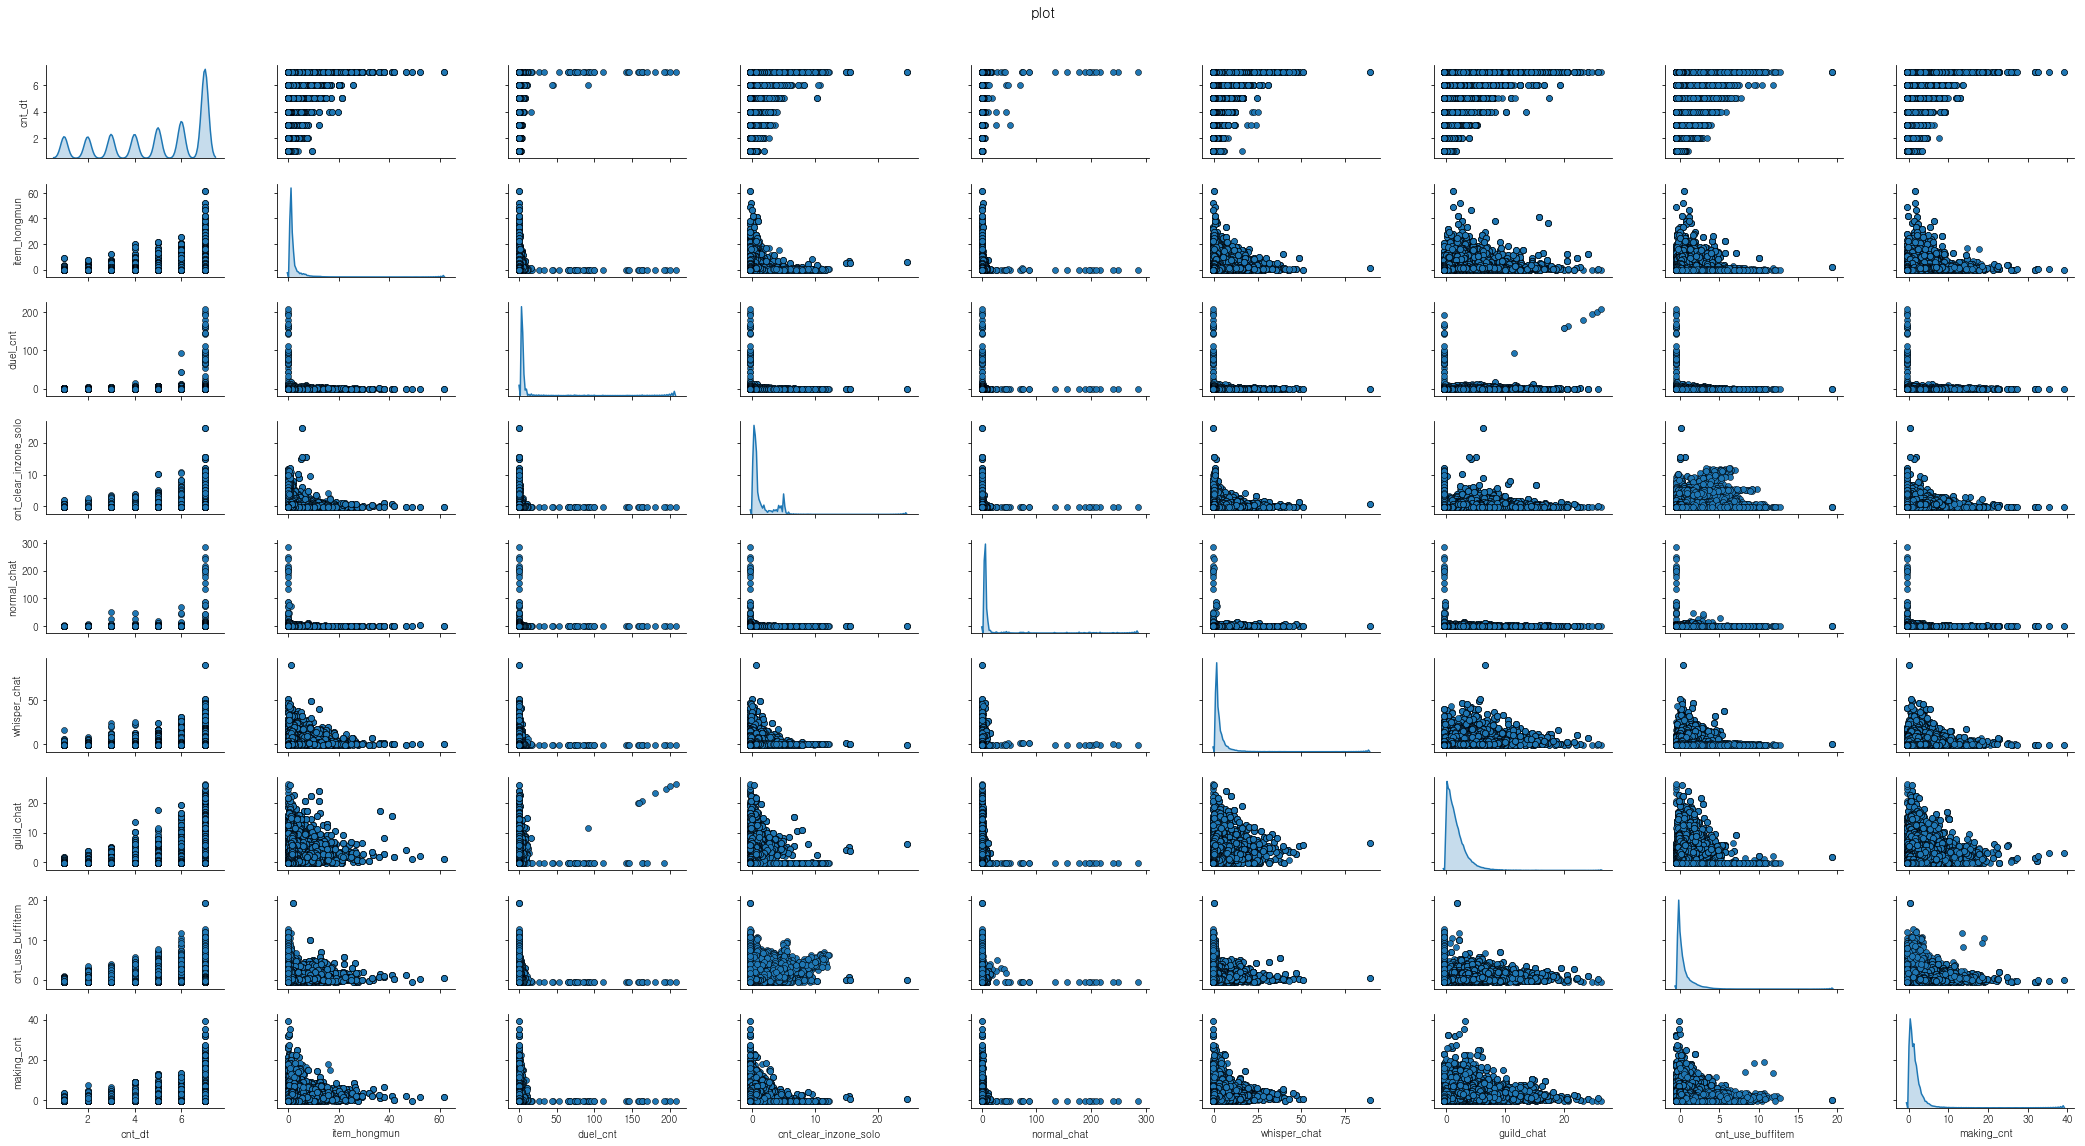

In [25]:
cols_nd = ['cnt_dt', 'item_hongmun', 'duel_cnt', 'cnt_clear_inzone_solo',
       'normal_chat', 'whisper_chat', 'guild_chat', 'cnt_use_buffitem',
       'making_cnt']
pp = sns.pairplot(act_pay_label[cols_nd], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('plot', fontsize=14)

### 상위 12개

In [26]:
cols_high = [5,8,11,15,16,18,20,22,23,25,27,31]
act_label[act_label.columns[cols_high]].columns

Index(['quest_exp', 'game_combat_time', 'duel_win', 'cnt_enter_inzone_light',
       'cnt_enter_inzone_skilled', 'cnt_enter_raid', 'cnt_enter_bam',
       'cnt_clear_inzone_light', 'cnt_clear_inzone_skilled', 'cnt_clear_raid',
       'cnt_clear_bam', 'party_chat'],
      dtype='object')

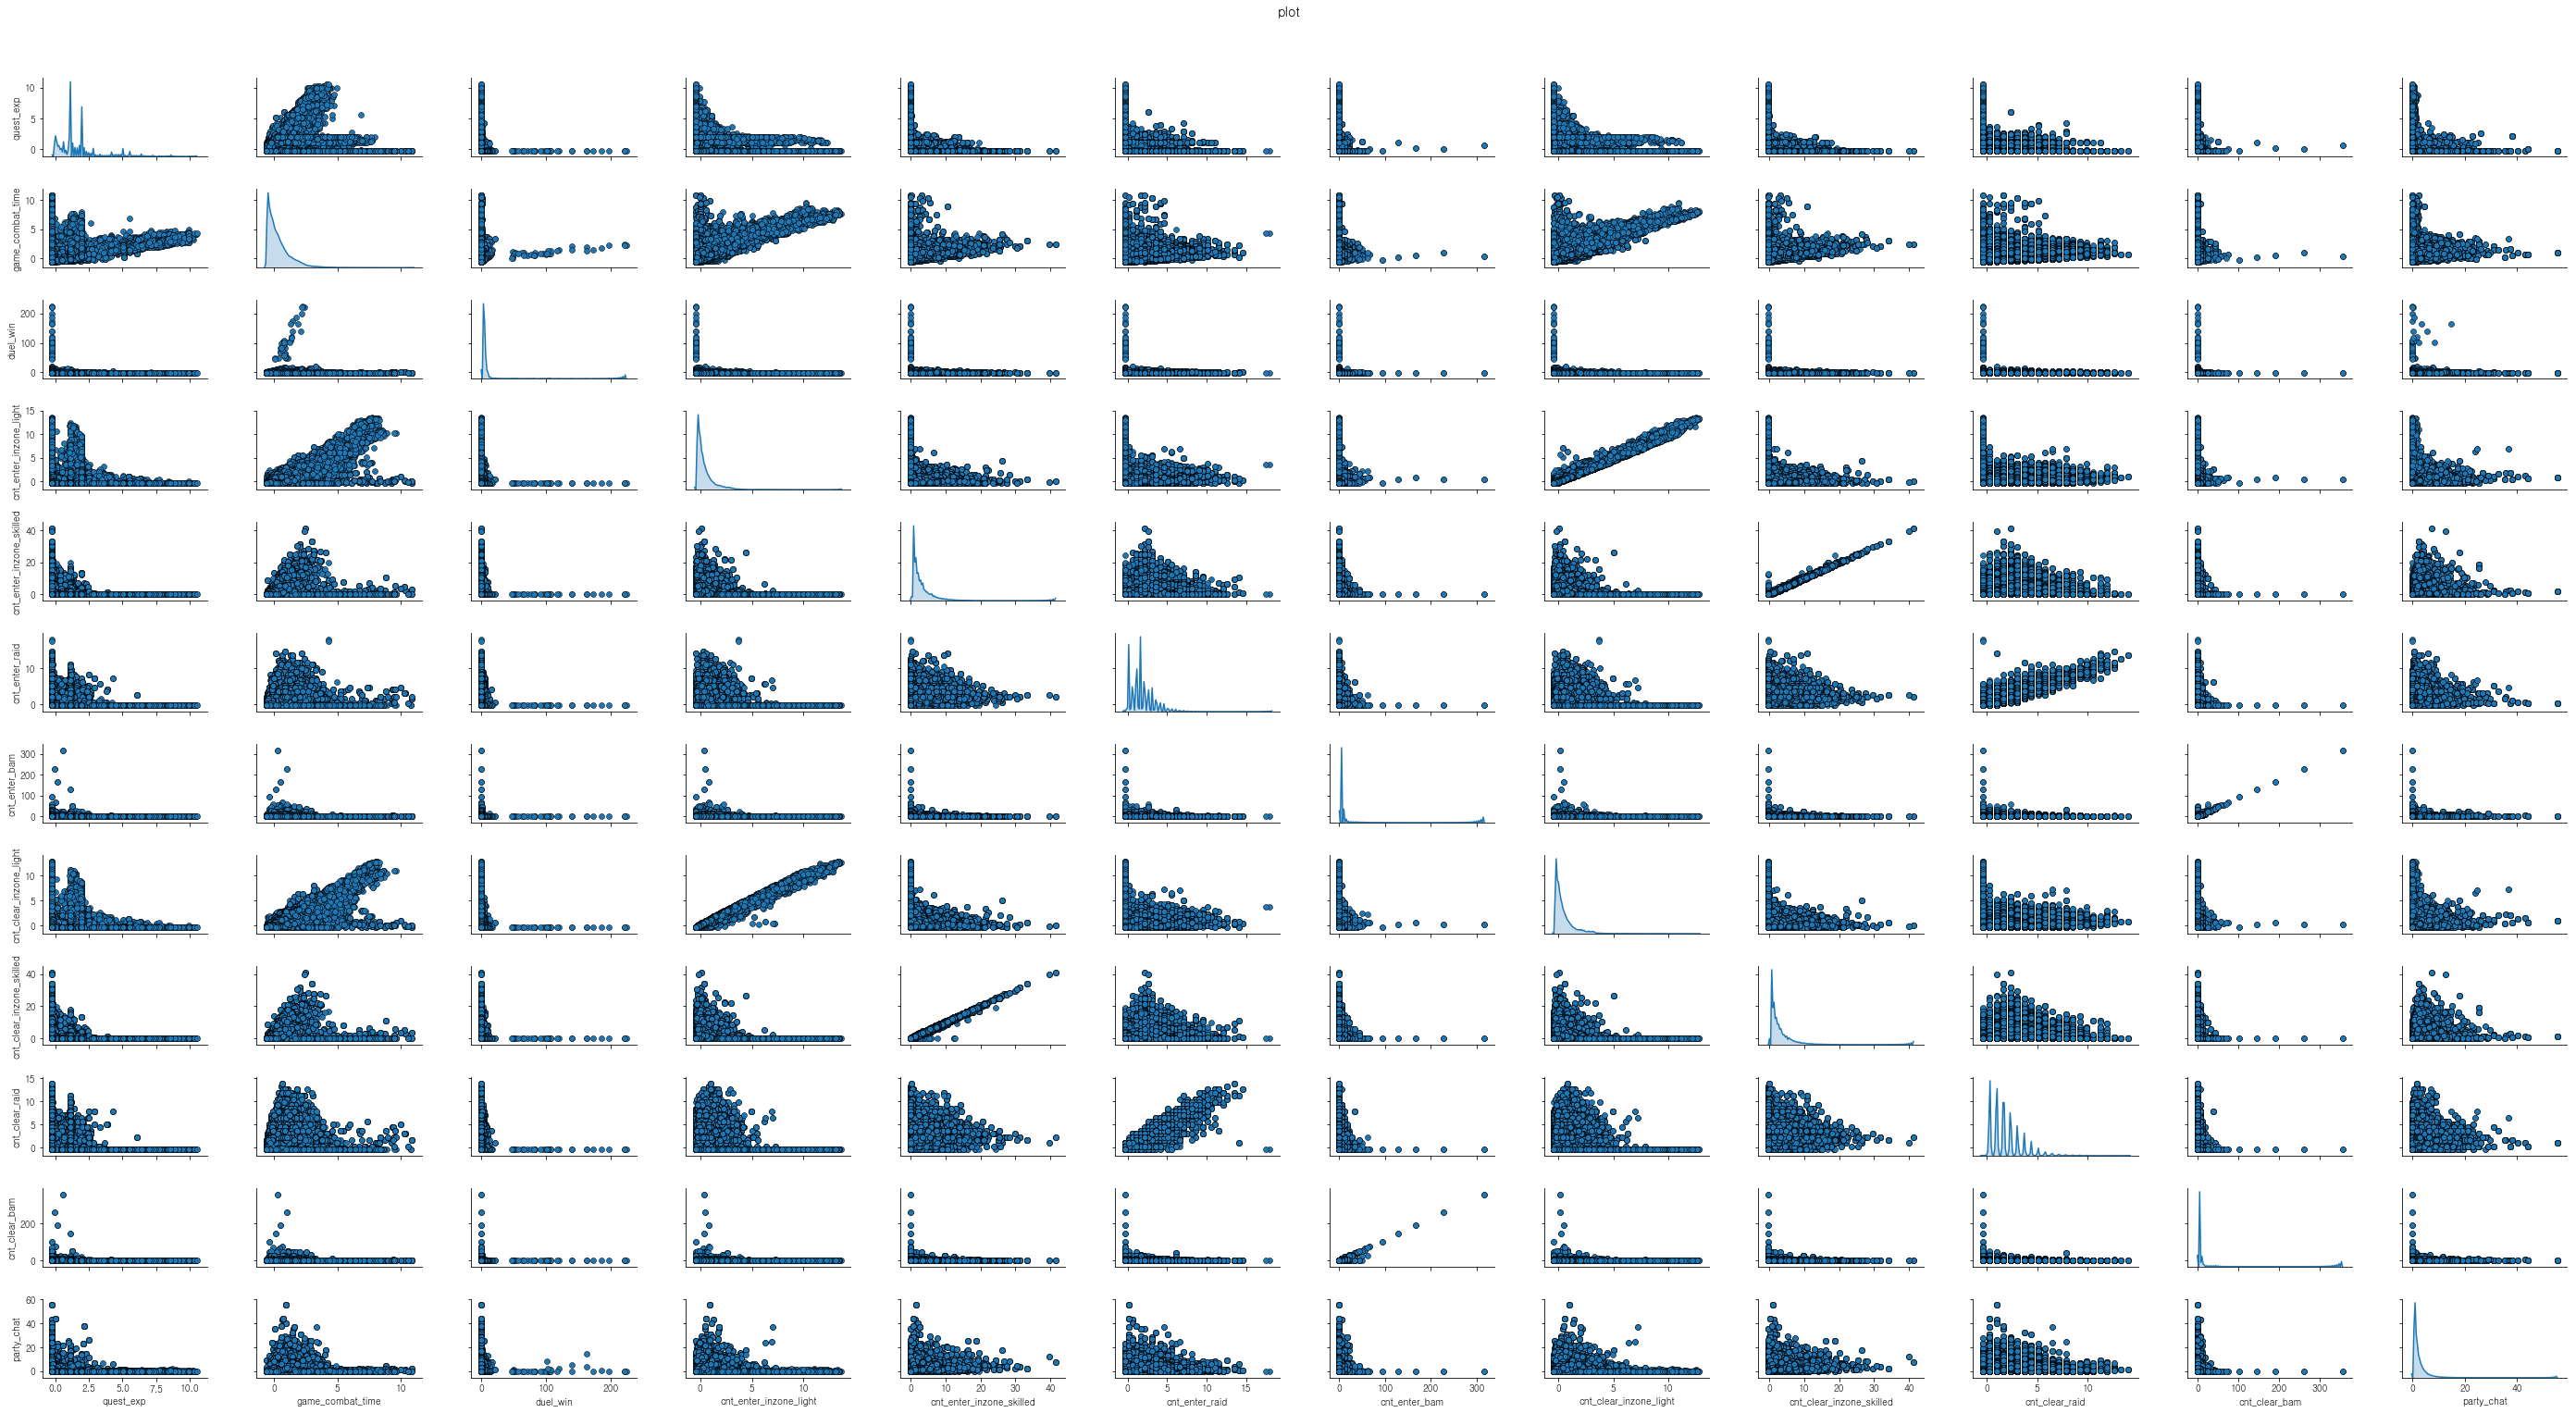

In [13]:
cols = ['quest_exp','game_combat_time','duel_win','cnt_enter_inzone_light','cnt_enter_inzone_skilled',
        'cnt_enter_raid','cnt_enter_bam', 'cnt_clear_inzone_light','cnt_clear_inzone_skilled','cnt_clear_raid','cnt_clear_bam','party_chat']

pp = sns.pairplot(act_pay_label[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('plot', fontsize=14)

## parallel coordinates 시각화

C:\Users\user-\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  after removing the cwd from sys.path.


TypeError: 7 is not a string

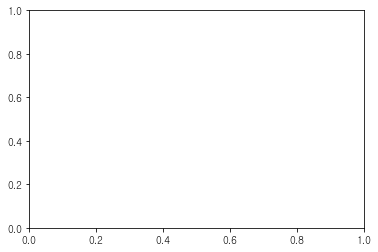

In [102]:
from pandas.tools.plotting import parallel_coordinates
import seaborn as sns
data = act_pay_label
parallel_coordinates(data, 'label', colormap=plt.get_cmap("Set2"))
plt.show()


## F값 추출

In [80]:
sklearn.feature_selection.f_classif(act_label, label)

(array([3.87495414e+03, 1.50051785e+04, 1.00931682e+04, 4.48403938e+03,
        5.75469345e+03, 7.00366843e+03, 5.28658253e+03, 1.26037983e+04,
        7.25017652e+03, 2.33102340e+01, 1.71483298e+02, 2.14891436e+02,
        4.52102296e+03, 4.27638470e+03, 1.85966113e+03, 5.41068618e+03,
        6.38694273e+03, 6.31498994e+03, 2.41838150e+04, 2.56309345e+04,
        2.43218679e+02, 1.83862759e+03, 5.16192790e+03, 6.34114088e+03,
        6.08133520e+03, 2.41716096e+04, 2.67585574e+04, 1.14362283e+02,
        8.21848791e+01, 6.08010946e+03, 5.33296526e+01, 1.02498384e+04,
        2.01822298e+04, 1.15709424e+02, 5.65250725e+03, 1.00625784e+01,
        1.34281754e+04]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 4.42862875e-015, 4.09292823e-111, 2.63086142e-139,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+00